# IBM HR Analytics Employee Attrition & Performance

## Veri indirme işlemi

In [3]:
import pandas as pd
import kagglehub
import shutil
import os

In [4]:
# 1. Veriyi indir (Kaggle'ın cache klasörüne gider)
download_path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

100%|████████████████████████████████████████████████████████████████████████████████████████| 50.1k/50.1k [00:00<00:00, 349kB/s]

Extracting files...


In [5]:
# 2. Dosya adını belirle
csv_name = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
source_file = os.path.join(download_path, csv_name)

In [6]:
# 3. Dosyayı şu anki çalışma dizinine kopyala
shutil.copy(source_file, os.getcwd())

# 4. ÖNEMLİ: Kaggle'ın oluşturduğu o üst klasörü tamamen sil
# download_path genellikle '.../versions/1' şeklindedir, biz kök klasörü siliyoruz
root_cache_path = os.path.dirname(os.path.dirname(download_path)) 
shutil.rmtree(root_cache_path)

print(f"Kaggle cache klasörü temizlendi.")
print(f"Dosya artık sadece burada: {os.path.join(os.getcwd(), csv_name)}")

Kaggle cache klasörü temizlendi.
Dosya artık sadece burada: C:\Users\halit\Desktop\ML\Kodlama\TechAcademyKodlar\Proje\WA_Fn-UseC_-HR-Employee-Attrition.csv


In [7]:
df = pd.read_csv(csv_name)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Veriyi detaylıca inceleme

In [9]:
# attrition == yes => gitme eğiliminde

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
# alt taraftada numeric verileri inceliyoruz
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
# genel şablona bakalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

yukarıdan anlaşıldığı üzere eksik verimiz bulunmuyor(NaN)

histogram çiziminde -> (numeric) olanlar
Age, DailyRate, DistanceFromHome, HourlyRate, MonthlyIncome, MonthlyRate, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

bar plot çiziminde -> (kategorik) olanlar
BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime
   *yandakilerde sayısal ama bir kategori ifade ediyor*  Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance, NumCompaniesWorked, TrainingTimesLastYear

## Şimdi gelin sıra sıra verilerin işten ayrılma eğilimi ile bağlantısını inceleyelim

In [15]:
import matplotlib.pyplot as plt

In [16]:
def bar_plot(feature):
    feat = df[feature]
    feat_values = feat.value_counts()

    plt.figure(figsize=(9,3))
    plt.bar(feat_values.index, feat_values)
    plt.xticks(feat_values.index,feat_values.index.values)
    plt.ylabel("Frequency")
    plt.title(feature)
    plt.show()
    print("{}: \n {}".format(feature,feat_values))

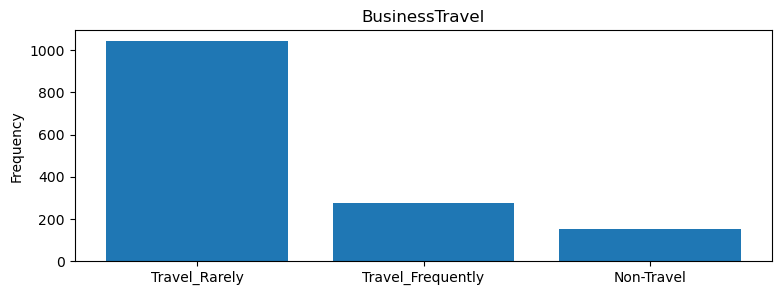

BusinessTravel: 
 BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


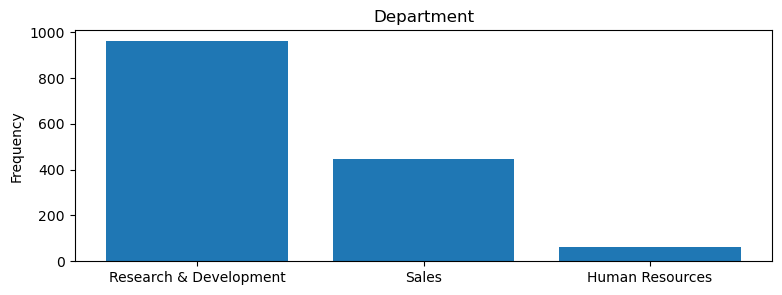

Department: 
 Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


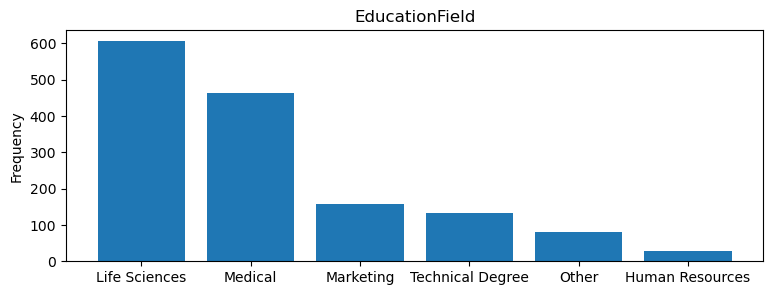

EducationField: 
 EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


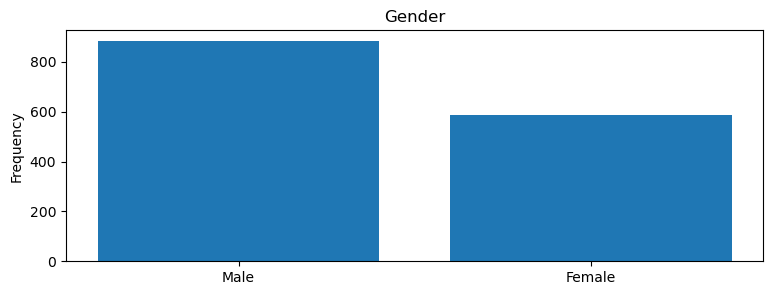

Gender: 
 Gender
Male      882
Female    588
Name: count, dtype: int64


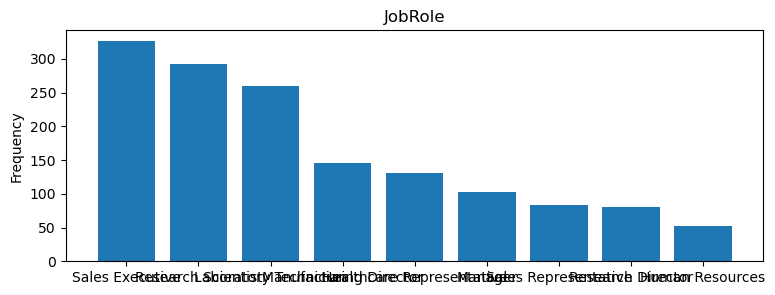

JobRole: 
 JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


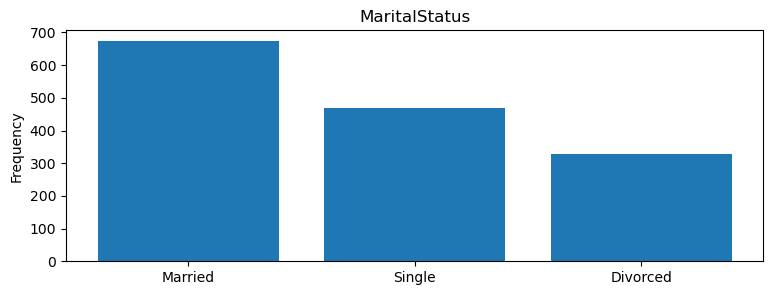

MaritalStatus: 
 MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


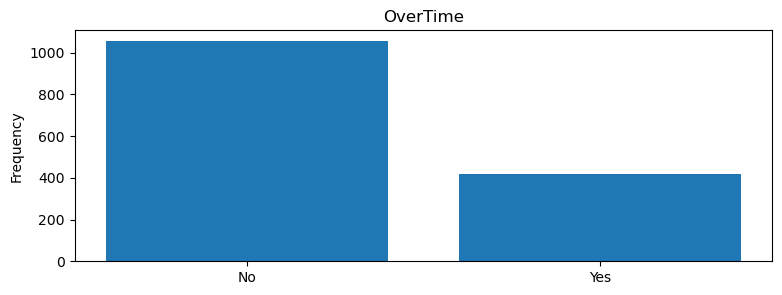

OverTime: 
 OverTime
No     1054
Yes     416
Name: count, dtype: int64


In [17]:
kategorik_direkt = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
for c in kategorik_direkt:
    bar_plot(c)

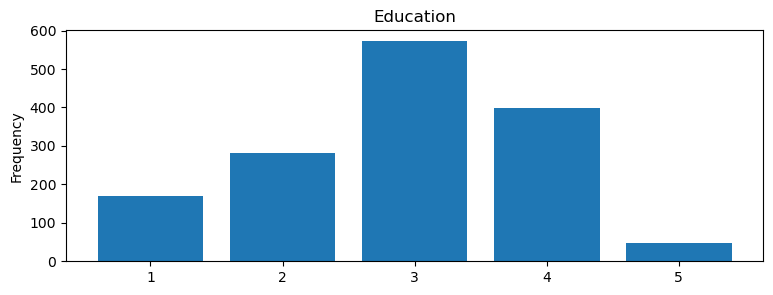

Education: 
 Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64


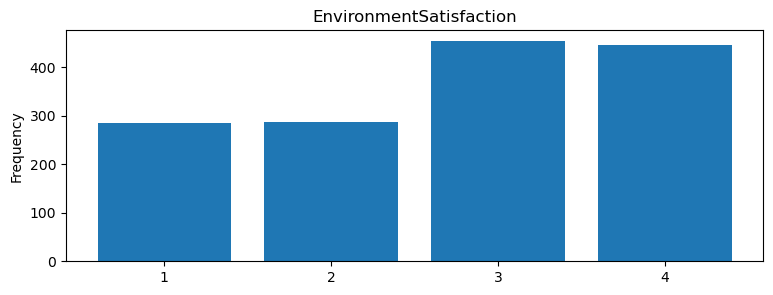

EnvironmentSatisfaction: 
 EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64


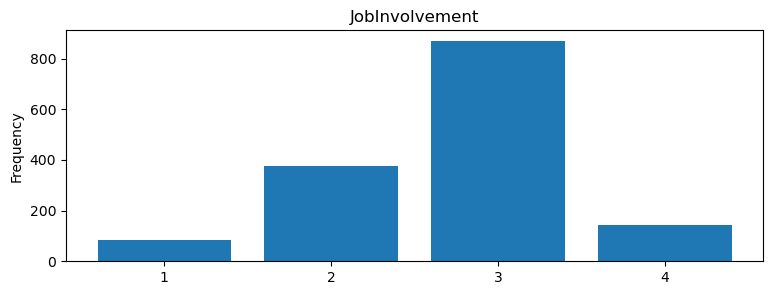

JobInvolvement: 
 JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64


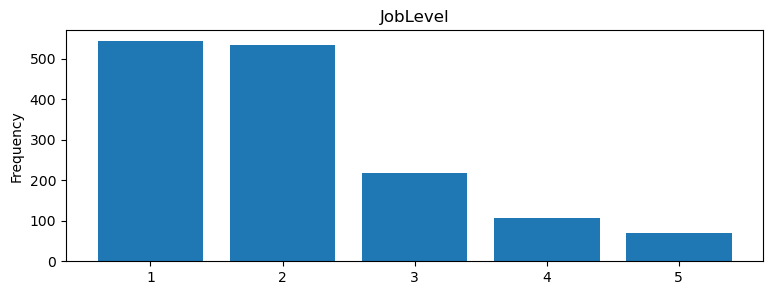

JobLevel: 
 JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64


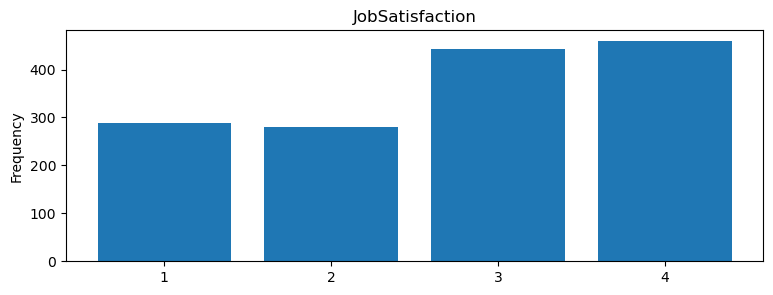

JobSatisfaction: 
 JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64


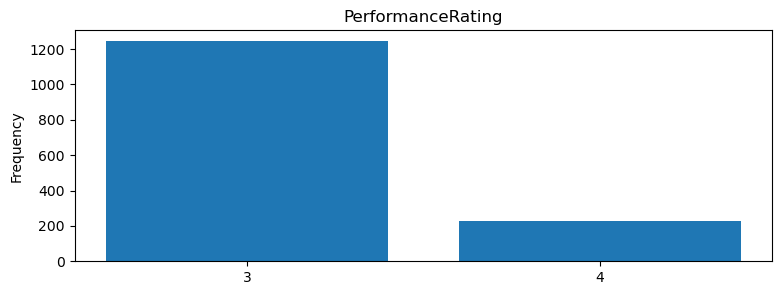

PerformanceRating: 
 PerformanceRating
3    1244
4     226
Name: count, dtype: int64


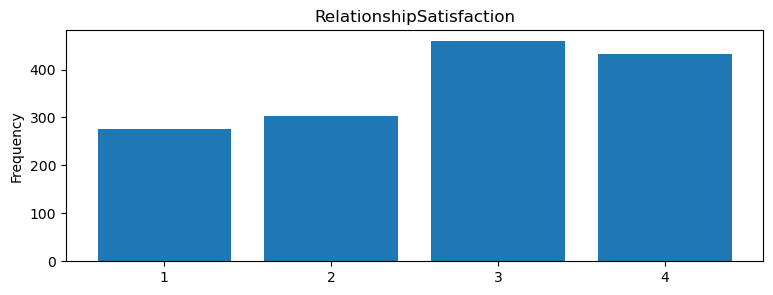

RelationshipSatisfaction: 
 RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64


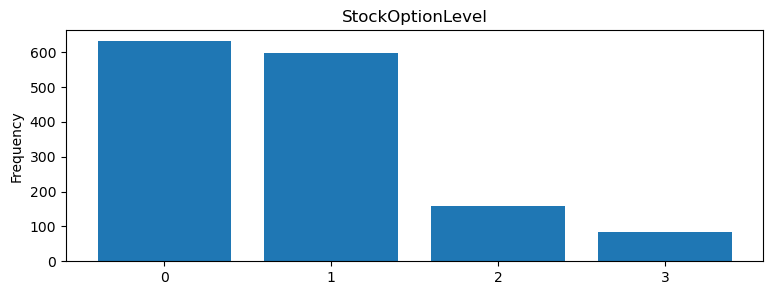

StockOptionLevel: 
 StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64


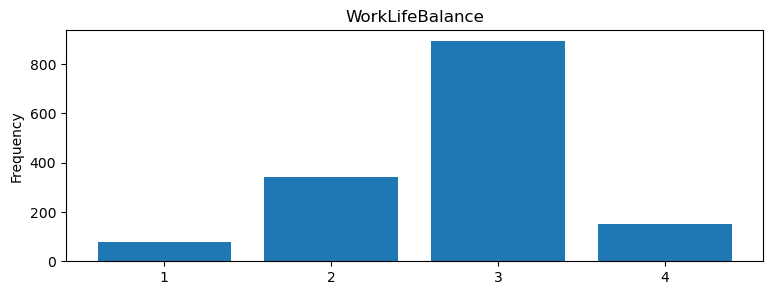

WorkLifeBalance: 
 WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


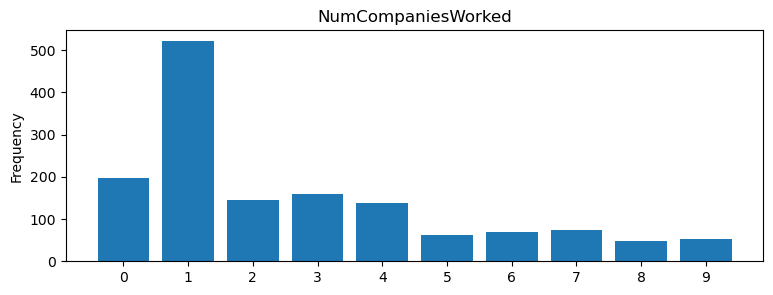

NumCompaniesWorked: 
 NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64


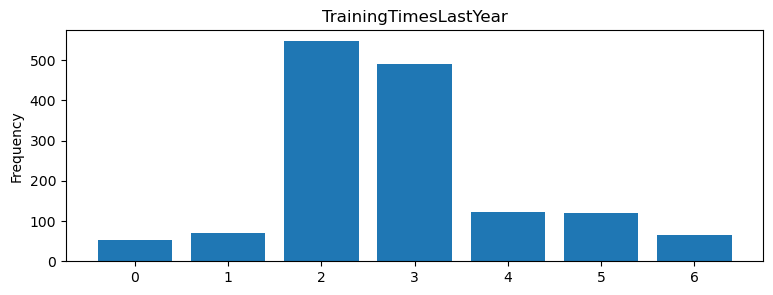

TrainingTimesLastYear: 
 TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64


In [18]:
kategorik_numeric = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance", "NumCompaniesWorked", "TrainingTimesLastYear"]
for c in kategorik_numeric:
    bar_plot(c)

In [19]:
# numeric value için incelemelr

In [20]:
def plot_hist(feature):
    plt.figure(figsize = (9,3))
    # bins = 50 ile veriyi 50 adet dikey çubuğa böleriz
    plt.hist(df[feature],bins = 50)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(feature))
    plt.show()

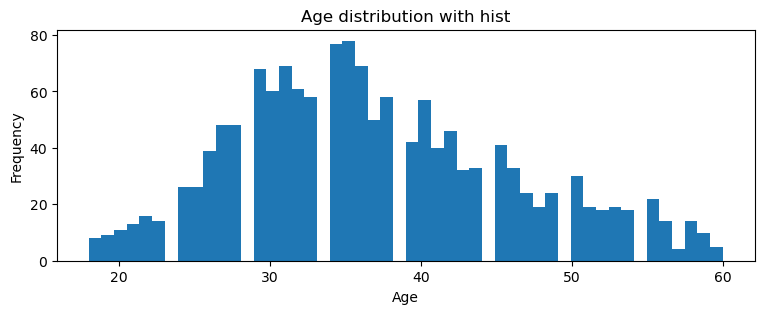

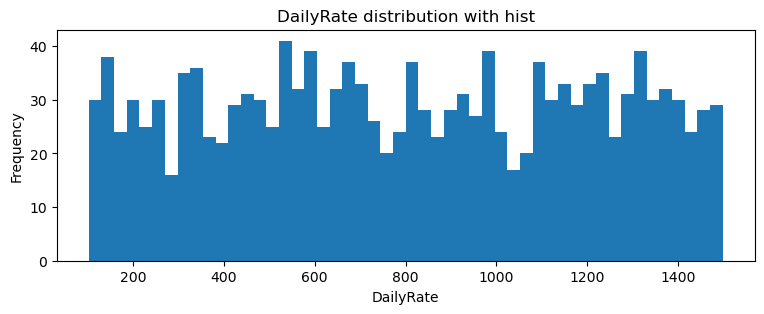

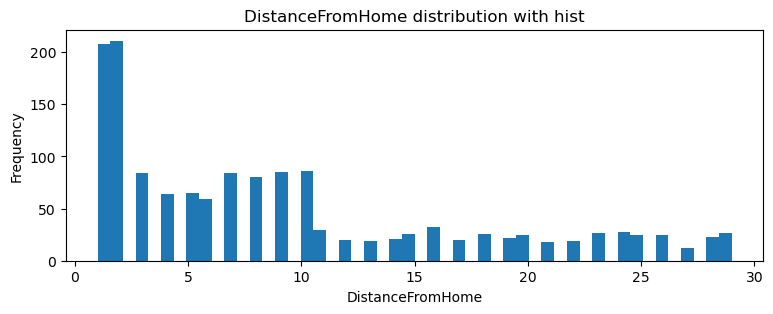

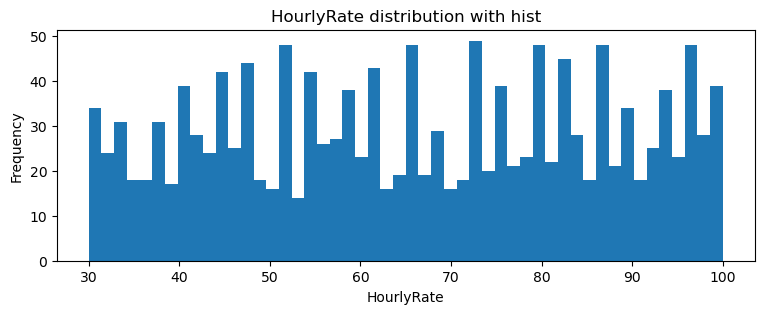

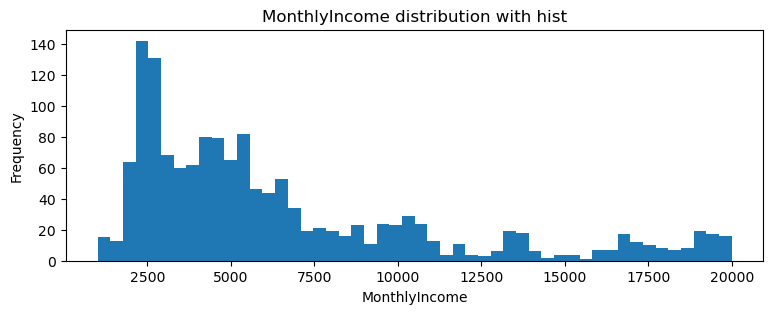

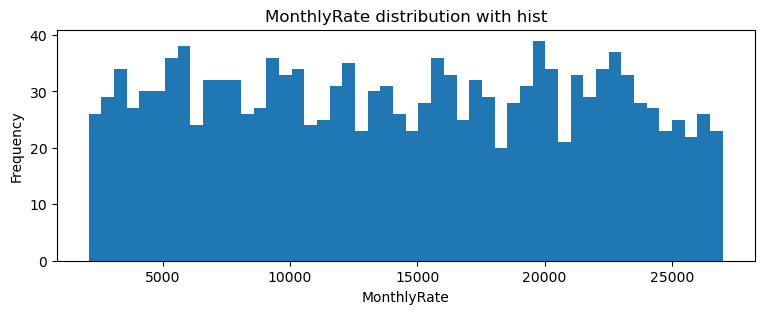

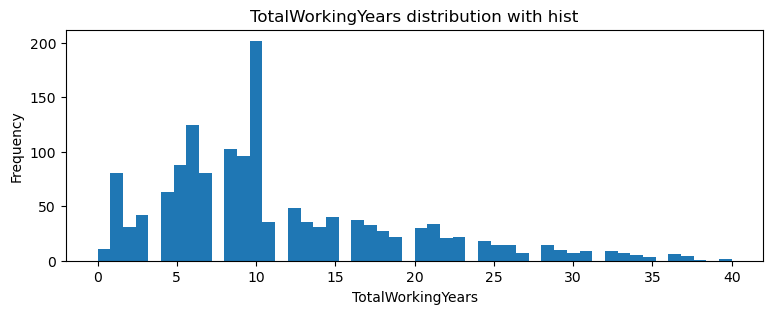

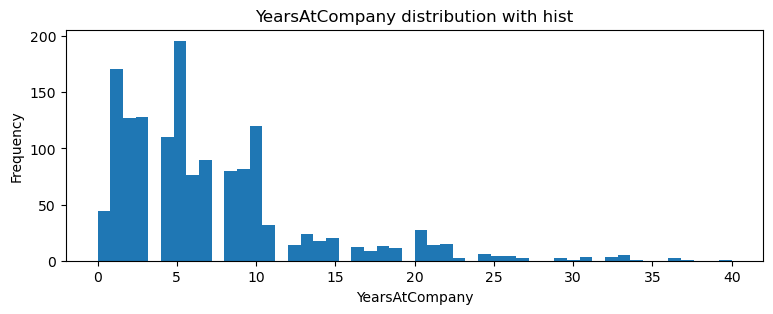

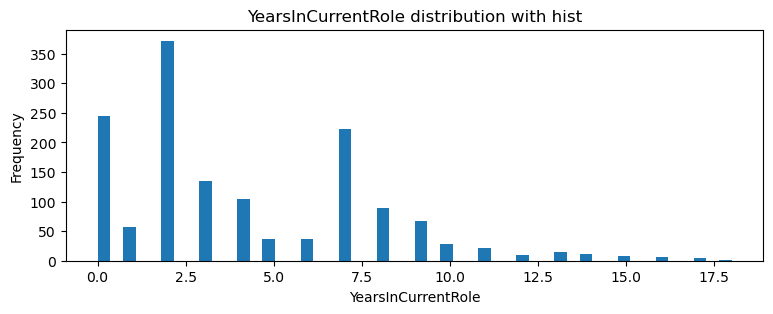

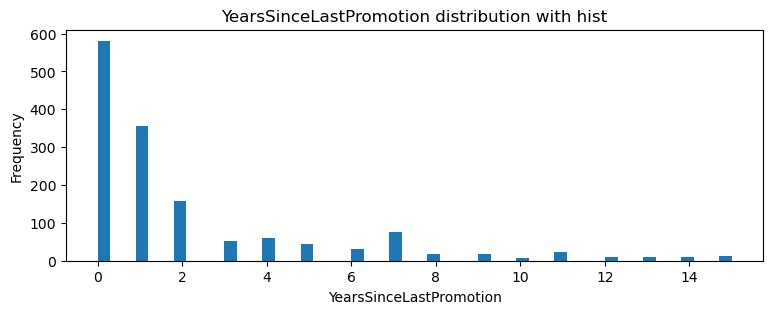

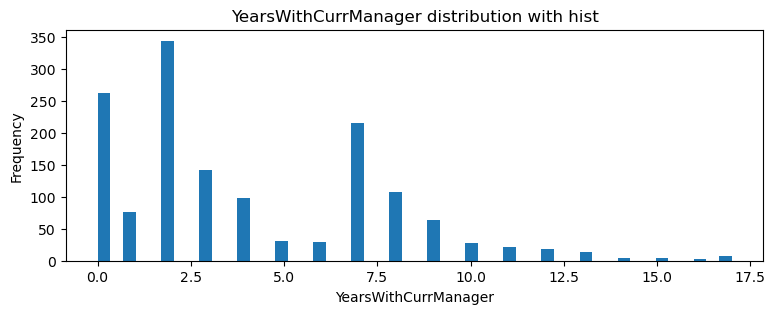

In [21]:
numeric = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
for n in numeric:
    plot_hist(n)

## Burada da attrition ile verilerin ikili karşılaştırmasın bakalım

In [23]:
# öncelikle 
# Attrition: Yes -> 1, No -> 0
df['Attrition_Num'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df.drop(["Attrition"], axis = 1, inplace=True)

In [24]:
df[["OverTime","Attrition_Num"]].groupby(["OverTime"], as_index = False).mean().sort_values(by = "Attrition_Num", ascending=False)

,OverTime,Attrition_Num
1,Yes,0.305288
0,No,0.104364


In [25]:
df[["JobLevel","Attrition_Num"]].groupby(["JobLevel"], as_index = False).mean().sort_values(by = "Attrition_Num", ascending=False)

,JobLevel,Attrition_Num
0,1,0.263352
2,3,0.146789
1,2,0.097378
4,5,0.072464
3,4,0.047170


In [26]:
def analysis_data(feature):
    summary = df[[feature,"Attrition_Num"]].groupby([feature], as_index = False).mean().sort_values(by = "Attrition_Num", ascending=False)
    print(summary)

In [27]:
for f in df.columns:
    if(f != "Attrition_Num"):
       analysis_data(f)

    Age  Attrition_Num
1    19       0.666667
2    20       0.545455
0    18       0.500000
3    21       0.461538
40   58       0.357143
4    22       0.312500
8    26       0.307692
10   28       0.291667
5    23       0.285714
6    24       0.269231
11   29       0.264706
13   31       0.260870
7    25       0.230769
38   56       0.214286
15   33       0.206897
26   44       0.181818
14   32       0.180328
34   52       0.166667
32   50       0.166667
12   30       0.150000
23   41       0.150000
21   39       0.142857
37   55       0.136364
17   35       0.128205
29   47       0.125000
28   46       0.121212
19   37       0.120000
16   34       0.116883
33   51       0.105263
35   53       0.105263
30   48       0.105263
22   40       0.087719
18   36       0.086957
31   49       0.083333
25   43       0.062500
9    27       0.062500
27   45       0.048780
24   42       0.043478
20   38       0.034483
36   54       0.000000
39   57       0.000000
41   59       0.000000
42   60    

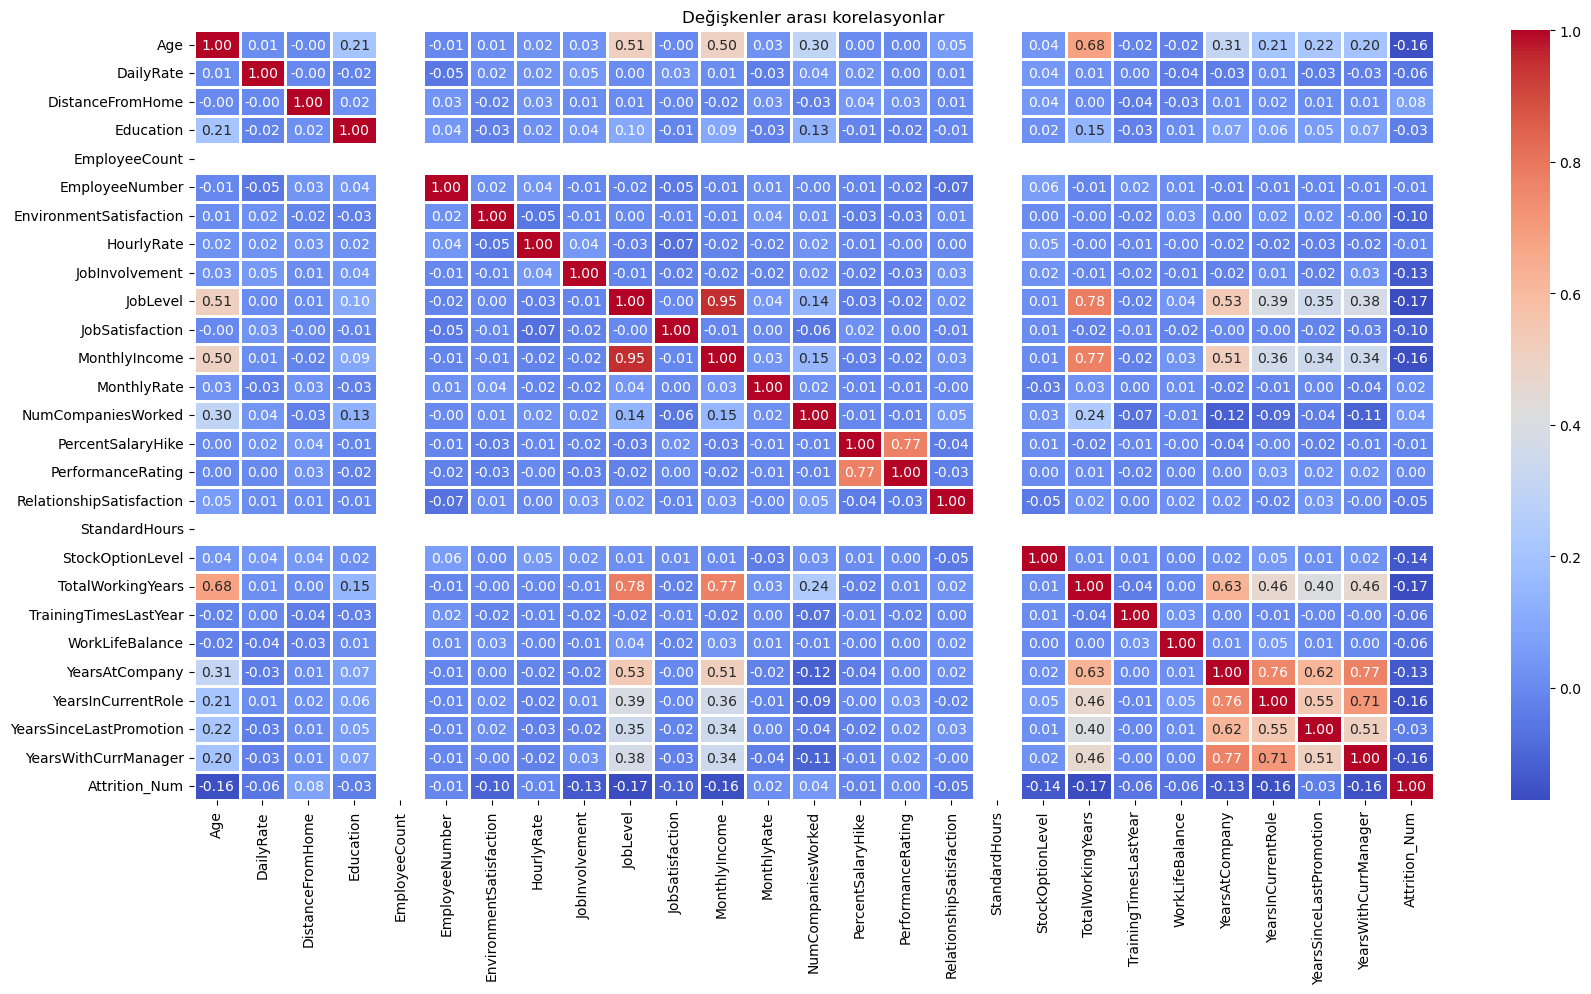

In [28]:
import seaborn as sns
numeric_df = df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(),annot = True, fmt=".2f",cmap='coolwarm', linewidths=0.9)
plt.title("Değişkenler arası korelasyonlar")
plt.show()

In [29]:
# öncelikle hem ısı haritasından hem de önceki detalı analizimizden anlaşılacağı üzere bazı features anlamsız, onları temizlememiz lazım
gereksiz_ozellikler = ["EmployeeCount","EmployeeNumber","Over18","StandardHours"]
df.columns
df.drop(gereksiz_ozellikler, axis = 1, inplace=True)
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_Num'],
      dtype='object')

In [30]:
# şimdide feature extraction yapalım
# mobtlh income ve job level arasında çok yüksek (0.95) korelasyon var
df["Income_per_level"] = df["MonthlyIncome"] / df["JobLevel"]
df.drop(["MonthlyIncome","JobLevel"],axis = 1, inplace= True)
analysis_data("Income_per_level")

      Income_per_level  Attrition_Num
0               1009.0            1.0
518             2707.0            1.0
572             2795.0            1.0
564             2785.0            1.0
559             2778.0            1.0
...                ...            ...
584             2814.0            0.0
120             2093.0            0.0
586             2818.0            0.0
587             2819.0            0.0
1290            4999.0            0.0

[1291 rows x 2 columns]


In [31]:
df["Income_Efficiency"] = [0 if i < 2000 else 1 if i < 3000 else 2 if i < 5000 else 3 for i in df["Income_per_level"]]
df.drop("Income_per_level", axis = 1, inplace=True)
analysis_data("Income_Efficiency")

   Income_Efficiency  Attrition_Num
0                  0       0.294118
1                  1       0.182176
2                  2       0.122066


In [32]:
# yukarıdaki sonuçtan anlayacağımız üzere seviyeye göre olan gelir arttıkça işten çıkma ihtimali düşüyor

In [33]:
# şimdide ısı haritasından göreceğimiz üzere toplam yıl ve şirketteki toplam yıl arası pozitif yüksek korelasyon var, bunları kullanarak bir loyalty yapalım
df["Loyalty_Ratio"] = df["YearsAtCompany"] / (df["TotalWorkingYears"] + 1)
df["Loyalty_Ratio"]

0       0.666667
1       0.909091
2       0.000000
3       0.888889
4       0.285714
          ...   
1465    0.277778
1466    0.700000
1467    0.857143
1468    0.500000
1469    0.571429
Name: Loyalty_Ratio, Length: 1470, dtype: float64

In [34]:
df["Loyalty_Score"] = [0 if i < 0.3 else 1 if i < 0.7 else 2 for i in df["Loyalty_Ratio"]]
analysis_data("Loyalty_Score")
df.drop(["Loyalty_Ratio","YearsAtCompany","TotalWorkingYears"],axis = 1, inplace=True)

   Loyalty_Score  Attrition_Num
1              1       0.218324
0              0       0.181230
2              2       0.106481


In [35]:
# şimdide ısı tablosunu incelediğimizde aynı rolde  ve aynı yönetici ile çalışmanın arasındaki yüksek korelasyon dikkat çekiyor bunu hesaplyalım
df["Stability_Index"] = df["YearsInCurrentRole"] / (df["YearsWithCurrManager"] + 1)
df["Stability_Index"]

0       0.666667
1       0.875000
2       0.000000
3       7.000000
4       0.666667
          ...   
1465    0.500000
1466    0.875000
1467    0.500000
1468    0.666667
1469    1.000000
Name: Stability_Index, Length: 1470, dtype: float64

In [36]:
df["Stability_Score"] = [0 if i < 0.3 else 1 if i < 0.7 else 2 for i in df["Stability_Index"]]
analysis_data("Stability_Score")
df.drop(["Stability_Index","YearsInCurrentRole","YearsWithCurrManager"],axis = 1, inplace=True)

   Stability_Score  Attrition_Num
0                0       0.295775
1                1       0.138889
2                2       0.123342


In [37]:
# yukarıdan rol değiikliği veya müdür değişikliği oranı fazla ise işten ayrılma ihtimali artıyor

In [38]:
# altta tekrardan incelemeleri yapalım yeni durumlar üzerinden gerekirse tekrardan feature eng yaparız

In [39]:
for f in df.columns:
    if(f != "Attrition_Num"):
       analysis_data(f)

    Age  Attrition_Num
1    19       0.666667
2    20       0.545455
0    18       0.500000
3    21       0.461538
40   58       0.357143
4    22       0.312500
8    26       0.307692
10   28       0.291667
5    23       0.285714
6    24       0.269231
11   29       0.264706
13   31       0.260870
7    25       0.230769
38   56       0.214286
15   33       0.206897
26   44       0.181818
14   32       0.180328
34   52       0.166667
32   50       0.166667
12   30       0.150000
23   41       0.150000
21   39       0.142857
37   55       0.136364
17   35       0.128205
29   47       0.125000
28   46       0.121212
19   37       0.120000
16   34       0.116883
33   51       0.105263
35   53       0.105263
30   48       0.105263
22   40       0.087719
18   36       0.086957
31   49       0.083333
25   43       0.062500
9    27       0.062500
27   45       0.048780
24   42       0.043478
20   38       0.034483
36   54       0.000000
39   57       0.000000
41   59       0.000000
42   60    

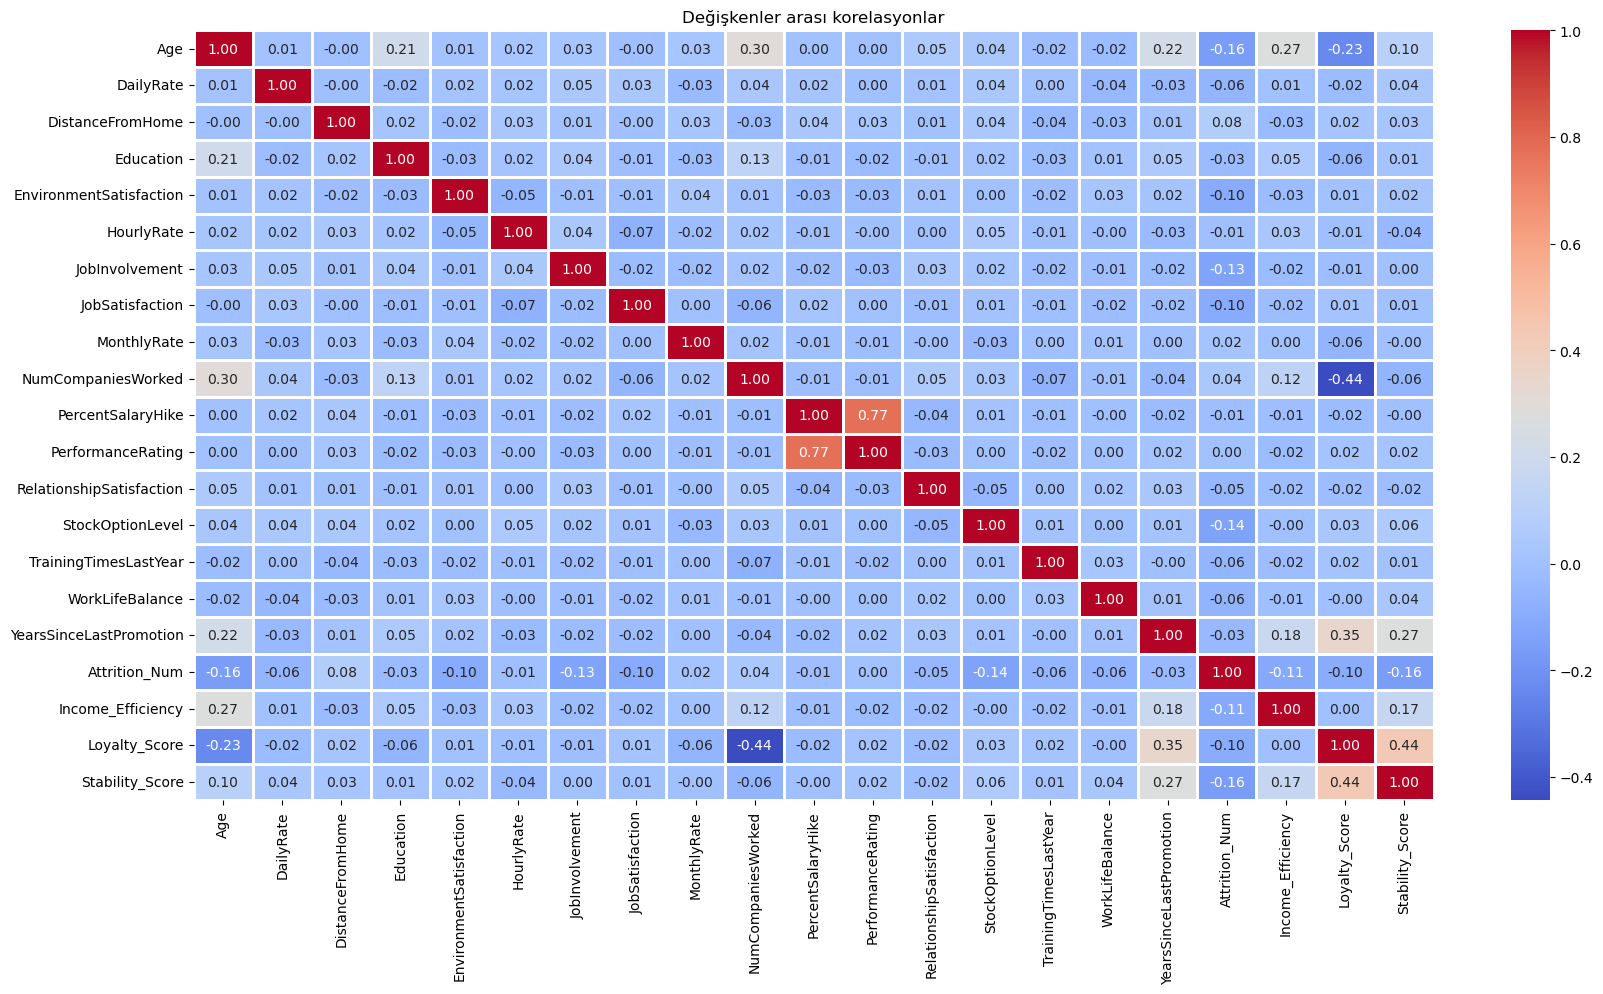

In [40]:
numeric_df = df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(),annot = True, fmt=".2f",cmap='coolwarm', linewidths=0.9)
plt.title("Değişkenler arası korelasyonlar")
plt.show()

In [154]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsSinceLastPromotion', 'Attrition_Num', 'Income_Efficiency',
       'Loyalty_Score', 'Stability_Score'],
      dtype='object')

In [41]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,Attrition_Num,Income_Efficiency,Loyalty_Score,Stability_Score
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.728571,14313.103401,2.693197,...,3.153741,2.712245,0.793878,2.799320,2.761224,2.187755,0.161224,1.388435,1.230612,1.319728
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.102846,7117.786044,2.498009,...,0.360824,1.081209,0.852077,1.289271,0.706476,3.222430,0.367863,0.574713,0.773463,0.777372
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,2094.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,8047.000000,1.000000,...,3.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,3.000000,14235.500000,2.000000,...,3.000000,3.000000,1.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,2.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,4.000000,20461.500000,4.000000,...,3.000000,4.000000,1.000000,3.000000,3.000000,3.000000,0.000000,2.000000,2.000000,2.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,26999.000000,9.000000,...,4.000000,4.000000,3.000000,6.000000,4.000000,15.000000,1.000000,2.000000,2.000000,2.000000


In [156]:
# ısı haritasondan görüleceği üzere alttakiler -0.05 ile 0.05 arası değer alıyor yani çok düşük olduğu için çıkartıyoruz
dusuk_korelasyon_listesi = ["DailyRate", "HourlyRate", "MonthlyRate", "Education", "PerformanceRating", "RelationshipSatisfaction"]
df.drop(dusuk_korelasyon_listesi, axis=1, inplace=True)

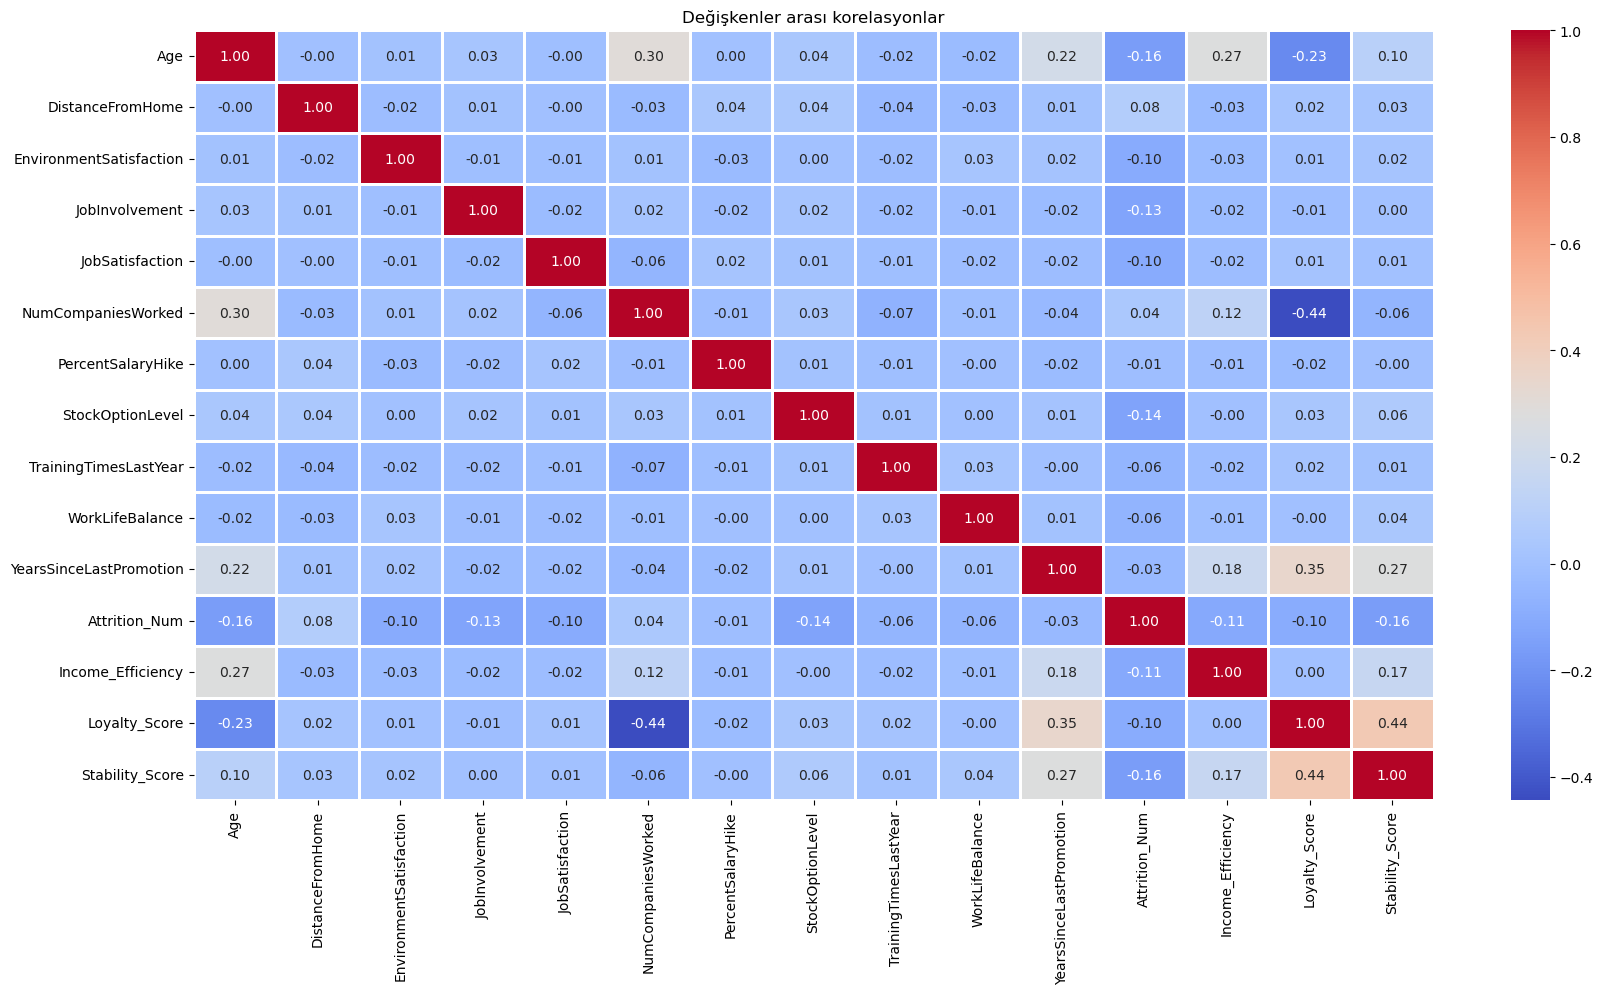

In [158]:
numeric_df = df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(),annot = True, fmt=".2f",cmap='coolwarm', linewidths=0.9)
plt.title("Değişkenler arası korelasyonlar")
plt.show()

In [160]:
# gözden kaçanlar
son_eleme_listesi = ["NumCompaniesWorked", "PercentSalaryHike"]
df.drop(columns=son_eleme_listesi, inplace=True)

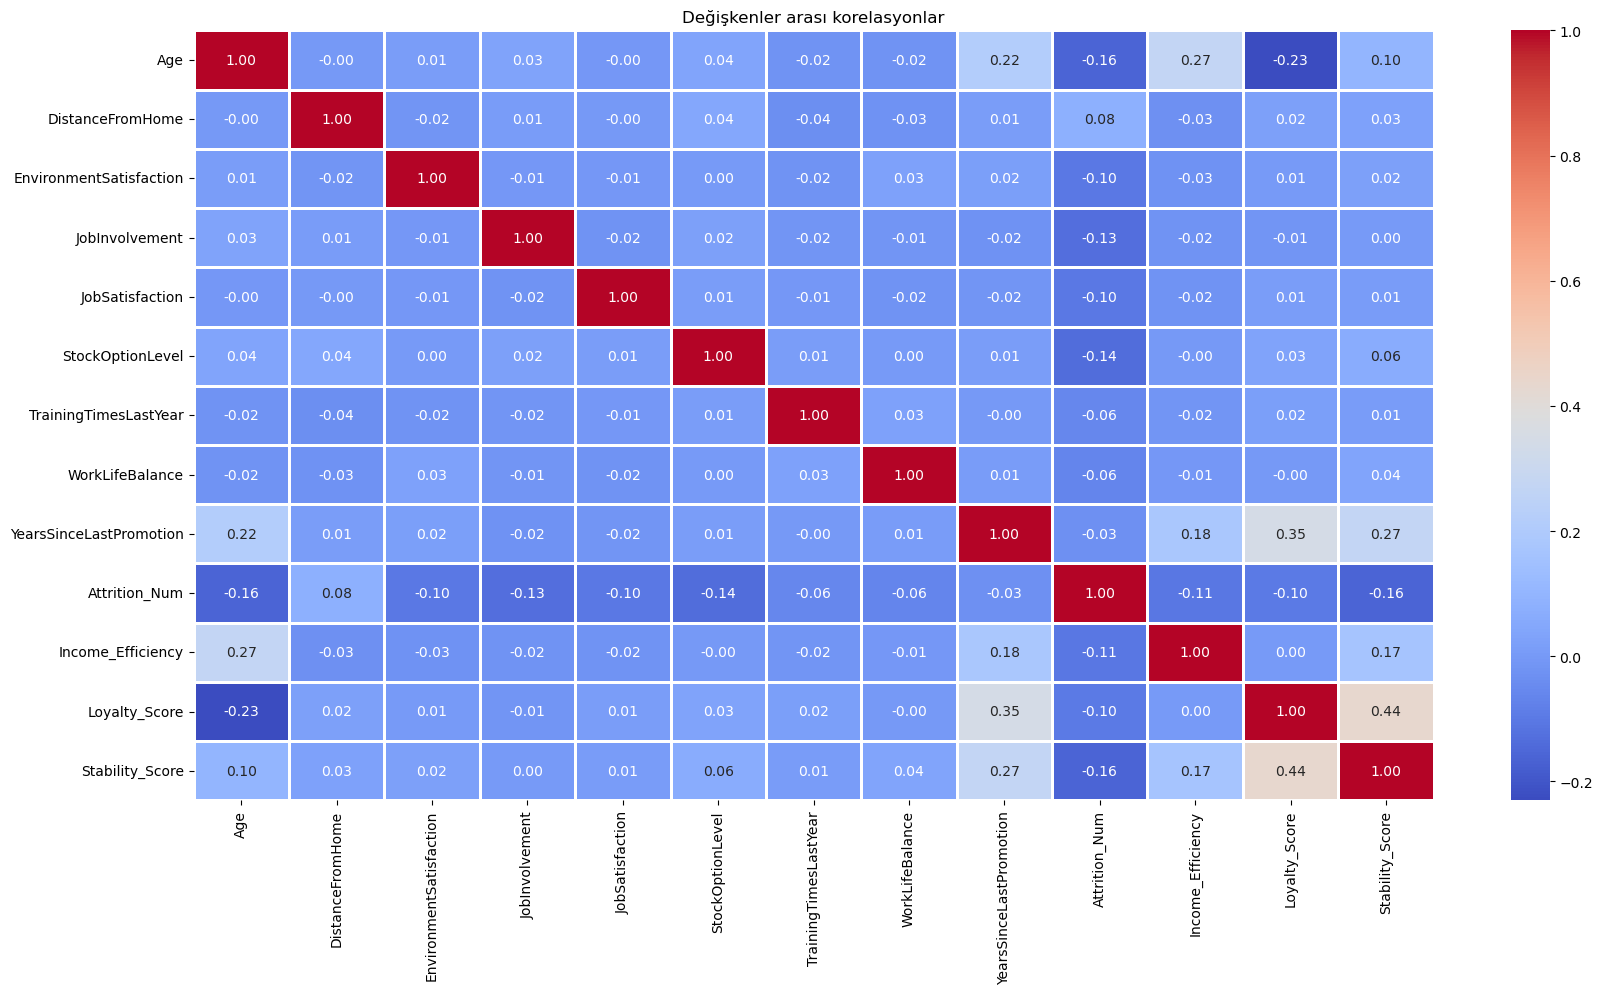

In [162]:
numeric_df = df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(),annot = True, fmt=".2f",cmap='coolwarm', linewidths=0.9)
plt.title("Değişkenler arası korelasyonlar")
plt.show()

In [166]:
# One hot coding
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,Attrition_Num,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,2,3,4,0,0,1,0,1,...,False,False,False,False,False,True,False,False,True,True
1,49,8,3,2,2,1,3,3,1,0,...,False,False,False,False,True,False,False,True,False,False
2,37,2,4,2,3,0,3,3,0,1,...,True,False,False,False,False,False,False,False,True,True
3,33,3,4,3,3,0,3,3,3,0,...,False,False,False,False,True,False,False,True,False,True
4,27,2,1,3,2,1,3,3,2,0,...,True,False,False,False,False,False,False,True,False,False


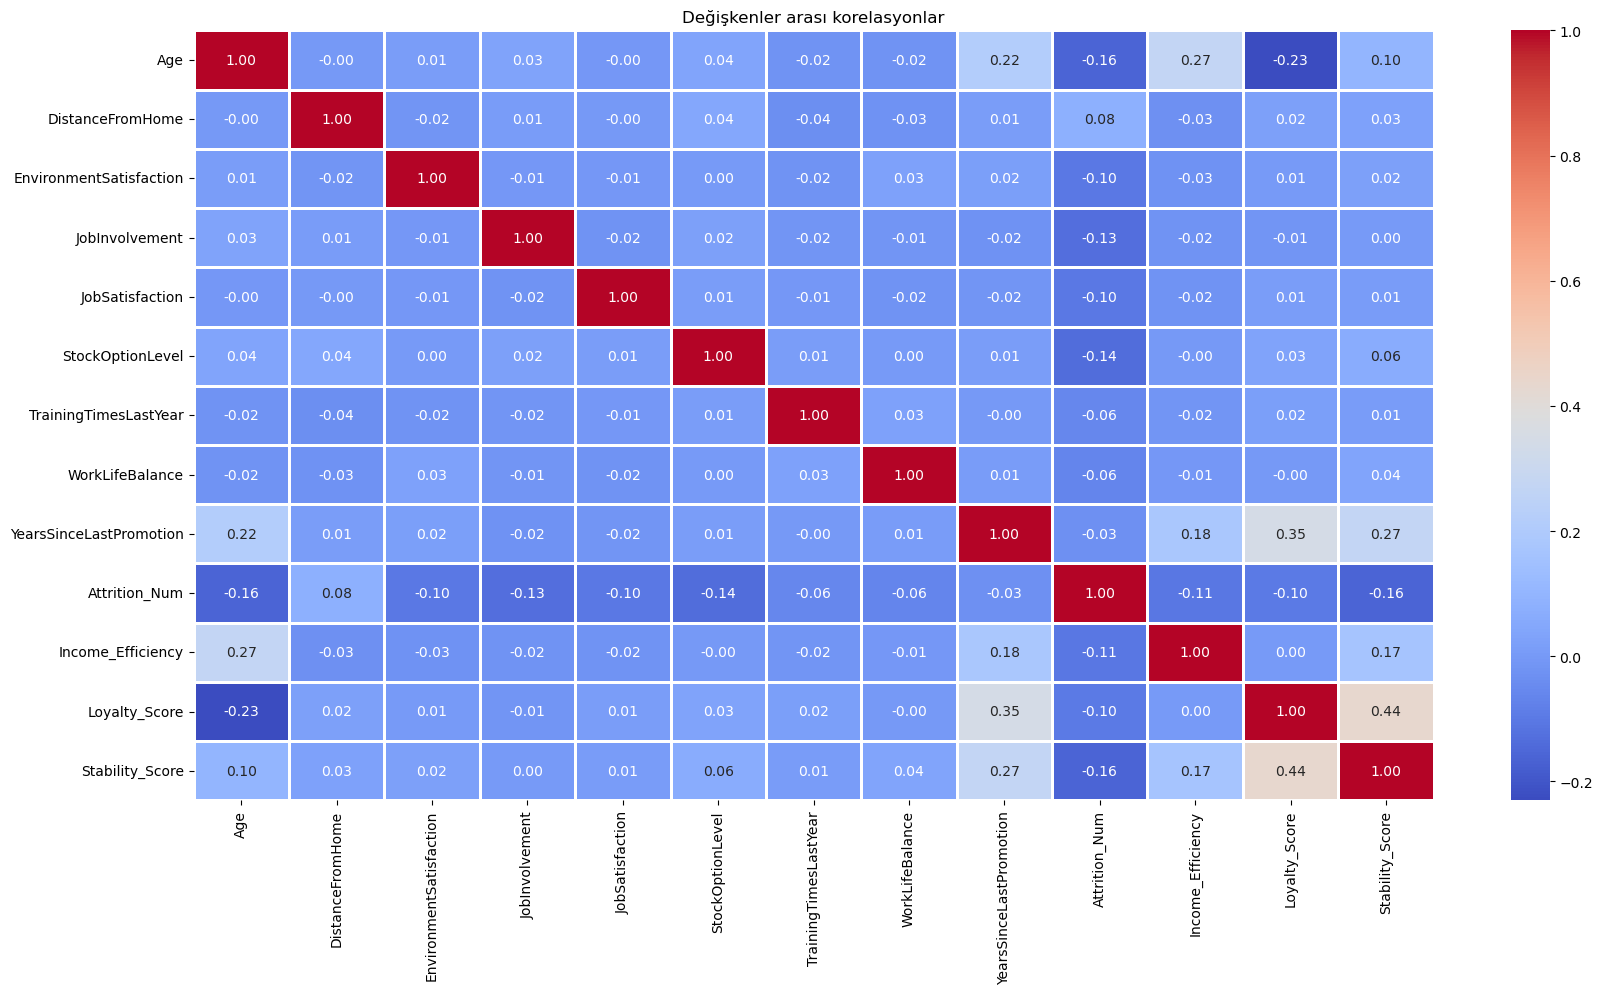

In [168]:
numeric_df = df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(),annot = True, fmt=".2f",cmap='coolwarm', linewidths=0.9)
plt.title("Değişkenler arası korelasyonlar")
plt.show()

## Modeling 

In [171]:
# öncelikle farklı kütüphaneleri deneyeceğiz böylece en iyi sonuç vereni seçip onun üzerinden en baştan gerekli feature eng ve hiperparametre ayarlamalarını yaparız

In [173]:
# gerekli kütüphane importları
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [177]:
X = df.drop("Attrition_Num", axis = 1)
y = df["Attrition_Num"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state = 42)

In [179]:
# modellerin tanımlanması
names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", "Random Forest", "Naive Bayes"]
classifiers = [
    KNeighborsClassifier(),
    SVC(probability=True), # Hiperparametre için olasılık açık
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

In [181]:
#hesaplamalar
results = []
for name, clf in zip(names, classifiers):
    # Pipeline kullanarak standartlaştırma yapıyoruz (Özellikle SVM ve KNN için şart)
    pipe = make_pipeline(StandardScaler(), clf)
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    results.append({"Model": name, "Score": score})

results_df = pd.DataFrame(results).sort_values(by="Score", ascending=False)
print("--- Model Yarıştırma Sonuçları ---")
print(results_df)

--- Model Yarıştırma Sonuçları ---
               Model     Score
1         Linear SVM  0.877551
3      Random Forest  0.874150
0  Nearest Neighbors  0.867347
2      Decision Tree  0.744898
4        Naive Bayes  0.731293


In [183]:
# tablodan gördüğümüz üzere naiveBayes ve DecisionTree kullanmak mantıklı değil, diğerleri arasında Linear SVM ve Random Forest bir tık daha önde gelmiş
# şimdi bunlar arasından da Random Forest ayrılma sebepleri farklılık gösterebileceği için bu problem için daha uygun görünüyor ve Linear göre outlier 
# tespit işlemi daha rahat olur gibi

In [185]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300], # Kaç tane ağaç oluşturulsun?
    'max_depth': [None, 10, 20, 30], # Ağaçların derinliği ne kadar olsun?
    'min_samples_split': [2, 5, 10], # Bir düğümü bölmek için gereken min örnek sayısı
    'criterion': ['gini', 'entropy'] # Dallanma kriteri
}

In [187]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 3. En iyi parametreleri bulmak için eğit
grid_search.fit(X_train, y_train)

# 4. En iyi sonuçları yazdır
print("En İyi Parametreler:", grid_search.best_params_)
print("En İyi Skor:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
En İyi Parametreler: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
En İyi Skor: 0.8605553552109628


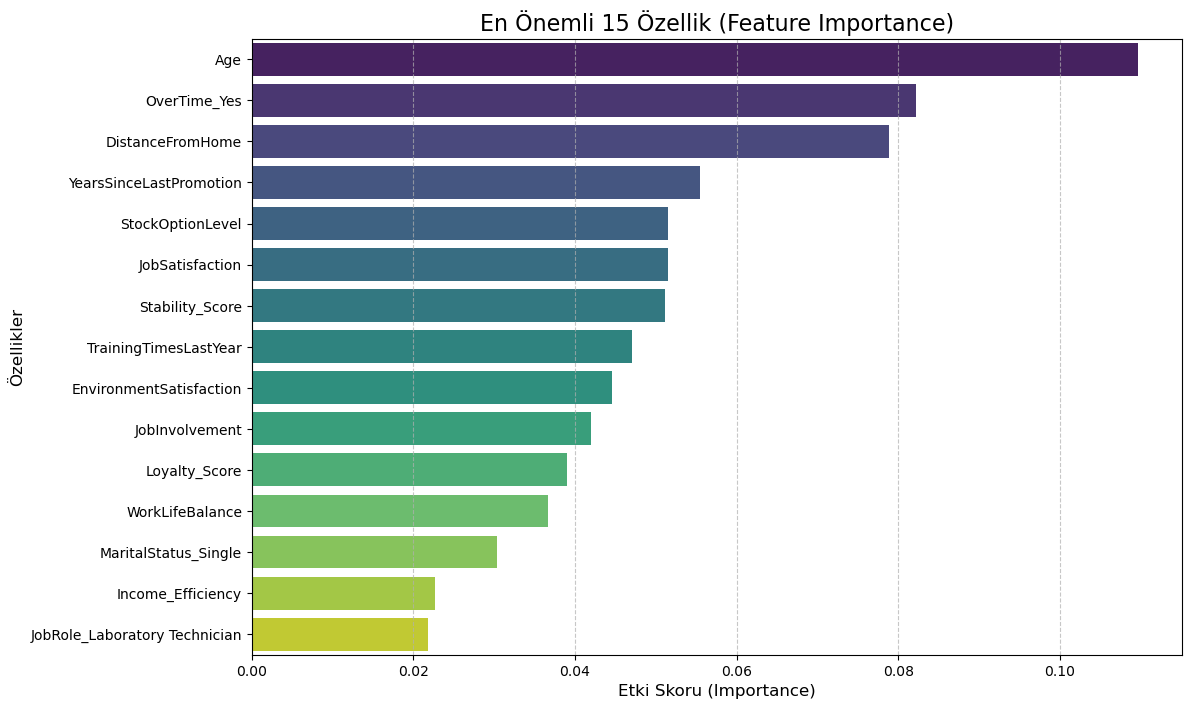

In [191]:
# şimdide en iyi sonu için tekrar eğitim ve görselleştirmeler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. En iyi parametrelerle modeli eğitmiş olduğunu varsayıyorum
# best_rf.fit(X_train, y_train)

# 2. Özellik önemlerini al
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 3. Görselleştirme (Uyarıyı gideren güncel versiyon)
plt.figure(figsize=(12, 8))

# Hatanın çözümü: y değişkenini hue'ya ata ve legend'ı kapat
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df.head(15), 
    hue='Feature',      # Renklendirmeyi Feature'a göre yap
    palette='viridis', 
    legend=False        # Gereksiz sağ taraf açıklamasını kaldır
)

plt.title('En Önemli 15 Özellik (Feature Importance)', fontsize=16)
plt.xlabel('Etki Skoru (Importance)', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Daha okunaklı olması için kılavuz çizgileri
plt.show()